**Dimenstionality Reduction**

## PCA  - Principle Component Analysis   
Unsupervised

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

C:\Users\Shoban_Ash\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
ds=pd.read_csv('Wine.csv')

In [3]:
ds.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
ds.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [5]:
x=ds.iloc[:,0:13].values
y=ds.iloc[:,13].values

In [6]:
x[0][0]

14.23

In [7]:
x,y

(array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
 

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)

In [9]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [10]:
pca=PCA(n_components=None)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)
explained_variance=pca.explained_variance_ratio_

In [11]:
explained_variance

array([0.36884109, 0.19318394, 0.10752862, 0.07421996, 0.06245904,
       0.04909   , 0.04117287, 0.02495984, 0.02308855, 0.01864124,
       0.01731766, 0.01252785, 0.00696933])

In [12]:
pca=PCA(n_components=2)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)

In [13]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
y_pred=log_reg.predict(x_test)

In [15]:
y_pred

array([1, 3, 2, 1, 2, 1, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

In [16]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]], dtype=int64)

In [17]:
cm[0][0],cm[1][1],cm[2][2]

(14, 15, 6)

In [18]:
cm.sum()

36

In [19]:
acc=(cm[0][0]+cm[1][1]+cm[2][2])/cm.sum()
acc*100

97.22222222222221

In [20]:
from matplotlib.colors import ListedColormap

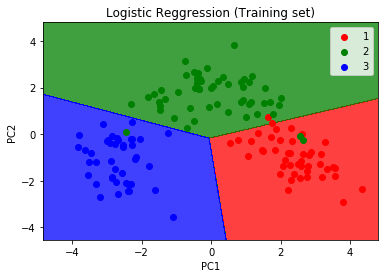

In [21]:
x_set,y_set=x_train,y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01)) # Return coordinate matrices from coordinate vectors. Make N-D coordinate arrays for vectorized evaluations of N-D scalar/vector fields over N-D grids, given one-dimensional coordinate arrays x1, x2,..., xn.
plt.contourf(x1,x2,log_reg.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape), #ravel - reshaping 1D array
             alpha=0.75,cmap=ListedColormap(('red','green','blue')))
plt.xlim(x1.min(),x2.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):    #l1 = ["eat","sleep","repeat"] , obj1 = enumerate(l1),print "Return type:",type(obj1), Return type: [(0, 'eat'), (1, 'sleep'), (2, 'repeat')]
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                c=ListedColormap(('red','green','blue'))(i),label=j)
plt.title('Logistic Reggression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

In [22]:
log_reg.score(x_train,y_train)

0.9647887323943662

In [23]:
log_reg.score(x_test,y_test)

0.9722222222222222

In [24]:
# the difference between accuracy scores is not more, that means the classifier is not overfitting

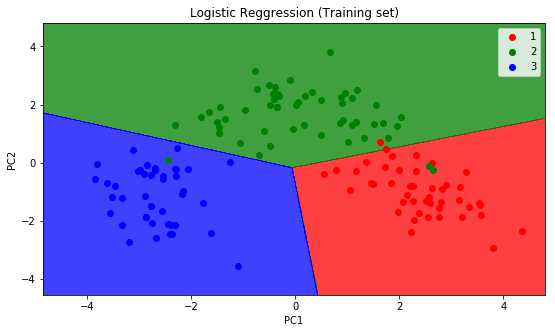

In [32]:
fig,axes=plt.subplots(figsize=(9,5))
x_set,y_set=x_train,y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01)) # Return coordinate matrices from coordinate vectors. Make N-D coordinate arrays for vectorized evaluations of N-D scalar/vector fields over N-D grids, given one-dimensional coordinate arrays x1, x2,..., xn.
axes.contourf(x1,x2,log_reg.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape), #ravel - reshaping 1D array
             alpha=0.75,cmap=ListedColormap(('red','green','blue')))
axes.set_xlim(x1.min(),x2.max())
axes.set_ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):    #l1 = ["eat","sleep","repeat"] , obj1 = enumerate(l1),print "Return type:",type(obj1), Return type: [(0, 'eat'), (1, 'sleep'), (2, 'repeat')]
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                c=ListedColormap(('red','green','blue'))(i),label=j)
axes.set_title('Logistic Reggression (Training set)')
axes.set_xlabel('PC1')
axes.set_ylabel('PC2')
plt.legend(loc=0)

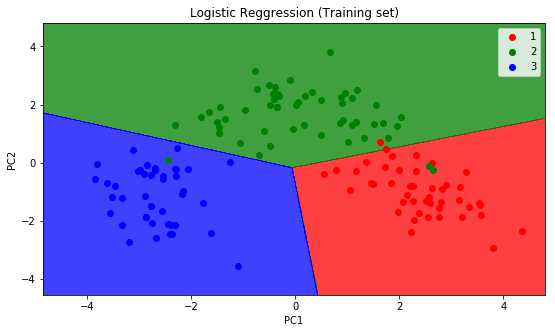

In [30]:
fig

In [31]:
fig.savefig('PCA Logistic.jpg',dpi=300)